In [18]:
import numpy as np
import time 
import resource
import matplotlib.pyplot as plt

**The Objective Function**  

In [19]:
def ComplexLandscape(x, y):
    return 4 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - \
        15 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) - \
        (1./3)*np.exp(-(x+1)**2 - y**2)-1*(2*(x-3)**7 -
                                           0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2)

**Finding the Partial Derivatives** 

In [20]:
def ComplexLandscapeGrad(x, y):
    g = np.zeros(2)
    g[0] = -8 * np.exp(-(x**2)-(y+1)**2)*((1-x)+x*(1-x)**2)-15 * np.exp(-x**2-y**2)*((0.2-3*x**2) - 2*x*(x/5 - x**3 - y**5)) + (
        2./3)*(x+1) * np.exp(-(x+1)**2 - y**2)-1 * np.exp(-(x-3)**2-(y-3)**2)*(14*(x-3)**6-2*(x-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    g[1] = -8*(y+1)*(1-x)**2 * np.exp(-(x**2)-(y+1)**2) - 15 * np.exp(-x**2-y**2)*(-5*y**4 - 2*y*(x/5 - x**3 - y**5)) + (2./3)*y * \
        np.exp(-(x+1)**2 - y**2)-1 * np.exp(-(x-3)**2-(y-3)**2) * \
        ((-1.5*(y-4)**4+9*(y-3)**8)-2*(y-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    return g

**Experiment 1: Finding suitable learning rates** 

In [21]:
"""Stocastic Gradien Ascent with fixed learning rate"""
def GradAscentLearningRateComplex(LRate):
    # Validation to see if the global maxima is ever reached 
    val = True
    # initialize the height as 0 
    height = 0
    # A list containing the heights at each epoch 
    heights = []
    # Variable to count the total number of epoch ran alltogether 
    total_iter = 0 
    

    for a in range(50):
        # Starting Point Randomly Selected 
        StartPt = np.array([np.random.uniform(-3, 7), np.random.uniform(-3, 7)])

        # Breaking the loop if we have reached global maxima 
        if height > 12.2:
            print("Global Maxima Reached Successfully")
            print("Height:", height)
            val = False
            break
            
        for i in range(100):
            
            # Findning the heright at corresponding starting point
            height = ComplexLandscape(StartPt[0], StartPt[1])

            # Calculating the gradient
            gradient = ComplexLandscapeGrad(StartPt[0], StartPt[1])

            # Calculate the new point and update StartPt
            StartPt = StartPt + LRate * gradient
            
            # Count of total iterations
            total_iter += 1
            
            # Breaking the loop if we have reached global maxima
            if height > 12.235:
                break
            
            
        # Adding the height to our list
        heights.append(height)

    # Checking if Global maxima has been reached to return relevant data 
    if val != False:
        print("Falied To Global Maxima Reached")
        print("Max Height:", max(heights))
        return max(heights), total_iter
    else:
        return height, total_iter
    
     

        
                


Run to view results from experiment 1 

In [22]:
# Lists to contain heights for various learning rates 
ln1 = []
ln05 = []
ln01 = []
ln0075 = []
ln005 = []
ln004 = []
ln003 =[]

# Lists to contain total number of epochs for various learning rates 
iter1 = []
iter05 = []
iter01 = []
iter0075 = []
iter005 = []
iter004 = []
iter003 = []

# Total number of times the algorithm is ran to take average (hence minimize the role randomness plays)
total = 50

# Running the algorithm for various learning rates and collecting data in the lists above 
for i in range(total): 
    ln, iteration = GradAscentLearningRateComplex(1)
    ln1.append(ln)
    iter1.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.5)
    ln05.append(ln)
    iter05.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.1)
    ln01.append(ln)
    iter01.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.075)
    ln0075.append(ln)
    iter0075.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.05)
    ln005.append(ln)
    iter005.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.04)
    ln004.append(ln)
    iter004.append(iteration)
    ln, iteration = GradAscentLearningRateComplex(0.03)
    ln003.append(ln)
    iter003.append(iteration)
    print("========================")

# Displaying results from the experiment 
print("====SUMMARY OF LEARNING RATE RESULTS====")
print("Learning Rate: 1","Average Height:", sum(ln1)/total, "Average Iterations:", sum(iter1)/total)
print("Learning Rate: 0.5","Average Height:", sum(ln05)/total, "Average Iterations:", sum(iter05)/total)
print("Learning Rate: 0.1","Average Height:", sum(ln01)/total, "Average Iterations:", sum(iter01)/total)
print("Learning Rate: 0.075","Average Height:", sum(ln0075)/total, "Average Iterations:", sum(iter0075)/total)
print("Learning Rate: 0.05","Average Height:", sum(ln005)/total, "Average Iterations:", sum(iter005)/total)
print("Learning Rate: 0.04","Average Height:", sum(ln004)/total, "Average Iterations:", sum(iter004)/total)
print("Learning Rate: 0.03","Average Height:", sum(ln003)/total, "Average Iterations:", sum(iter003)/total)

Falied To Global Maxima Reached
Max Height: 0.0013028203193853334
Falied To Global Maxima Reached
Max Height: 0.11051676725700574
Falied To Global Maxima Reached
Max Height: 9.151801103361057
Falied To Global Maxima Reached
Max Height: 11.90447889793436
Falied To Global Maxima Reached
Max Height: 10.671779474254286
Global Maxima Reached Successfully
Height: 12.235013133315299
Global Maxima Reached Successfully
Height: 12.235057022910981
Falied To Global Maxima Reached
Max Height: 0.0012112752449301271
Falied To Global Maxima Reached
Max Height: 0.00040096707931612627
Falied To Global Maxima Reached
Max Height: 8.762173632196225
Falied To Global Maxima Reached
Max Height: 12.137507516440811
Falied To Global Maxima Reached
Max Height: 10.671779474254286
Global Maxima Reached Successfully
Height: 12.235027063579787
Global Maxima Reached Successfully
Height: 12.235057578770897
Falied To Global Maxima Reached
Max Height: 0.0001796166209958738
Falied To Global Maxima Reached
Max Height: 0.00

**Experiment 2: Measuring the compuational performance with modified SGA where the learning rate starts large and decreases**

In [23]:
def GradAscent(LRate, multiplier):
    # Counting the total number of epochs
    total_iterations = 0
    # Initializing heights as 0 
    height = 0
    # Storing the value of the original learning rate in as another variable
    learning_rate = LRate
    # A list to store the heights 
    heights = []
    # Validate if global maxima has been reached 
    valid = True

    for a in range(50):
        # Going back to the original learning rate 
        LRate = learning_rate
        # Starting Point Randomly Selected 
        StartPt = np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
        # Breaking the loop if global maximum has been reached 
        if height > 12.2:
            valid = False
            break
        for i in range(100):
            # Uncomment if needed (the code below)
            #print(f"Iteration: {i}")
            #print("learning rate:", LRate)
            
            # Findning the heright at corresponding starting point
            height = ComplexLandscape(StartPt[0], StartPt[1])
            #print("Height:", height)

            # Calculating the gradient
            gradient = ComplexLandscapeGrad(StartPt[0], StartPt[1])
            #print("Gradient:", gradient)

            # Calculate the new point and update StartPt
            StartPt = StartPt + LRate * gradient
            #print("Starting Point:", StartPt)
            
            # Learning rate multiplied to decrease
            LRate *= multiplier

            # Add height to list     
            heights.append(height)

            # If maximum has been reached break the loop 
            if height > 12.235:
                break
            
            
    # Return relevant data based on reaching global maximum       
    if valid == True:
            
        return max(heights)
    else:
        return height

Compare the SGA algorithm from experiment 1 in terms of computational performance 

In [27]:
# Results for non modified algorithm for comparrison
learning_rate = 0.04
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscentLearningRateComplex(learning_rate)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

Global Maxima Reached Successfully
Height: 12.23500308143736
Global Maxima Reached Successfully
Height: 12.23501093176142
Global Maxima Reached Successfully
Height: 12.235004498912906
Global Maxima Reached Successfully
Height: 12.235005181176545
Global Maxima Reached Successfully
Height: 12.235002158486854
Global Maxima Reached Successfully
Height: 12.235020491972737
Global Maxima Reached Successfully
Height: 12.235017605186304
Global Maxima Reached Successfully
Height: 12.235022451495519
Global Maxima Reached Successfully
Height: 12.235021909179515
Global Maxima Reached Successfully
Height: 12.235022326361893
Global Maxima Reached Successfully
Height: 12.235019457404741
Global Maxima Reached Successfully
Height: 12.235006222043157
Global Maxima Reached Successfully
Height: 12.235018862726402
Global Maxima Reached Successfully
Height: 12.23500367970388
Global Maxima Reached Successfully
Height: 12.23502061845326
Global Maxima Reached Successfully
Height: 12.235018279223391
Global Maxim

TypeError: ignored

Run the follwing cells which contain various multiplier rates (different learning rates can also be uncommented). Please note that the code is repeated and therefore only the first cell is commented.

In [26]:
# The multiplier to decrease the learning rate 
multiplier = 0.6
# our learning rate 
learning_rate = 0.075
# Uncomment for different learning rates 
#learning_rate = 0.1
#learning_rate = 0.125
# A list to stor our heights 
heights = []
# Total number of time the algorithm is ran 
total = 1000
# variable to reflect the starting of time 
time_start = time.perf_counter()

# A loop to run our algorithm 1000 times and collect data 
for i in range(total):
    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 

# Measuring computation time  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0

# Display average results after 1000 iterations 
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 32.38573688799988 0.136474609375 MByte
Multiplier: 0.6 Learning Rate: 0.075 Average Height: 12.232488802198487


In [28]:
multiplier = 0.625
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 29.342277545000115 0.136474609375 MByte
Multiplier: 0.625 Learning Rate: 0.075 Average Height: 12.232582282700893


In [29]:
multiplier = 0.65
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 29.081310786999893 0.13672256469726562 MByte
Multiplier: 0.65 Learning Rate: 0.075 Average Height: 12.233457483692234


In [30]:
multiplier = 0.675
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 25.731307834000063 0.13695144653320312 MByte
Multiplier: 0.675 Learning Rate: 0.075 Average Height: 12.233425842676805


In [31]:
multiplier = 0.7
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 23.562660966000067 0.13695144653320312 MByte
Multiplier: 0.7 Learning Rate: 0.075 Average Height: 12.23347893065825


In [32]:
multiplier = 0.725
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 20.378638248000016 0.136993408203125 MByte
Multiplier: 0.725 Learning Rate: 0.075 Average Height: 12.23380622976776


In [33]:
multiplier = 0.75
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 20.509733834999906 0.136993408203125 MByte
Multiplier: 0.75 Learning Rate: 0.075 Average Height: 12.234176975441537


In [34]:
multiplier = 0.775
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 18.32944706300009 0.136993408203125 MByte
Multiplier: 0.775 Learning Rate: 0.075 Average Height: 12.234430089254378


In [35]:
multiplier = 0.8
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 18.299215141000104 0.136993408203125 MByte
Multiplier: 0.8 Learning Rate: 0.075 Average Height: 12.234769248565554


In [36]:
multiplier = 0.825
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 16.09356360700008 0.13700103759765625 MByte
Multiplier: 0.825 Learning Rate: 0.075 Average Height: 12.234818194876517


In [37]:
multiplier = 0.85
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 15.316167895000035 0.13700103759765625 MByte
Multiplier: 0.85 Learning Rate: 0.075 Average Height: 12.23506559893654


In [38]:
multiplier = 0.875
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 16.01385629000015 0.13702774047851562 MByte
Multiplier: 0.875 Learning Rate: 0.075 Average Height: 12.23506491266789


In [39]:
multiplier = 0.9
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 15.638153904000092 0.13703155517578125 MByte
Multiplier: 0.9 Learning Rate: 0.075 Average Height: 12.235103134257203


In [40]:
multiplier = 0.925
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 16.372937557000114 0.13703155517578125 MByte
Multiplier: 0.925 Learning Rate: 0.075 Average Height: 12.235136176758468


In [41]:
multiplier = 0.95
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 15.808994203000111 0.13703155517578125 MByte
Multiplier: 0.95 Learning Rate: 0.075 Average Height: 12.235021411712287


In [42]:
multiplier = 0.975
learning_rate = 0.075
#learning_rate = 0.1
#learning_rate = 0.125
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
  
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 16.13946870599989 0.13703155517578125 MByte
Multiplier: 0.975 Learning Rate: 0.075 Average Height: 12.235138572208962


In [43]:
# Best Solution
multiplier = 0.972
learning_rate = 0.118
heights = []
total = 1000
time_start = time.perf_counter()

for i in range(total):

    height = GradAscent(learning_rate, multiplier)
    heights.append(height) 
    
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("time", time_elapsed, memMb, "MByte")
print("Multiplier:", multiplier,"Learning Rate:", learning_rate,"Average Height:", sum(heights)/len(heights))

time 10.196746875000144 0.13703155517578125 MByte
Multiplier: 0.972 Learning Rate: 0.118 Average Height: 12.235014601620591


Plotting computational performance with different multipliers 

Text(0.5, 0.98, 'SGA time lapse for 1000 iterations')

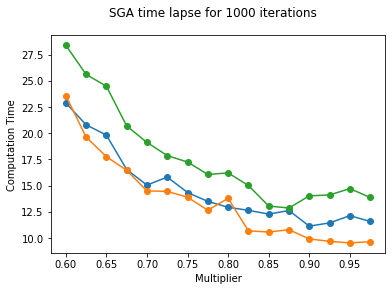

In [44]:
# A list to hold different multiplier used in the experiment 
multiplier = np.array([0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975])
# Lists to hold different times taken to complete the solution
time075 = np.array([28.39, 25.61, 24.48, 20.69, 19.12, 17.86, 17.25, 16.06, 16.21, 15.01, 13.05, 12.86, 14.02, 14.11, 14.71, 13.87])
time1 = np.array([22.89, 20.80, 19.82, 16.53, 15.05, 15.81, 14.34, 13.49, 12.93, 12.64, 12.28, 12.62, 11.13, 11.44, 12.13, 11.58])
time125 =np.array([23.58, 19.63, 17.76, 16.46, 14.49, 14.45, 13.89, 12.65, 13.78, 10.68, 10.57, 10.79, 9.91, 9.68, 9.53, 9.65])
# A list showing different heights reached in the experiment 
heights = np.array([12.233, 12.233, 12.234, 12.234, 12.234, 12.234, 12.235, 12.235, 12.235, 12.235, 12.235, 12.235, 12.235, 12.235, 12.235, 12.235])

# Plotting
fig = plt.figure()
plt.plot(multiplier, time1, marker = "o")
plt.plot(multiplier, time125, marker = "o")
plt.plot(multiplier, time075, marker = "o")
plt.xlabel("Multiplier")
plt.ylabel("Computation Time")
fig.suptitle("SGA time lapse for 1000 iterations")


**Experiment 3:** Comparing the convergance in both algorithms (with/without decreasing learning rate)

In [45]:
# Decreasing learning rate 

def GradAscent_Plot(LRate, multiplier):
    # Counting the total number of epochs
    total_iterations = 0
    # Initializing heights as 0 
    height = 0
    # Storing the value of the original learning rate in as another variable
    learning_rate = LRate
    # A list to store the heights 
    heights = []
    # Validate if global maxima has been reached 
    valid = True

    for a in range(50):
        # Going back to the original learning rate 
        LRate = learning_rate
        # Starting Point Randomly Selected 
        StartPt = np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
        # Breaking the loop if global maximum has been reached 
        if height > 12.2:
            valid = False
            break
        for i in range(100):
            # Uncomment if needed (the code below)
            #print(f"Iteration: {i}")
            #print("learning rate:", LRate)
            
            # Findning the heright at corresponding starting point
            height = ComplexLandscape(StartPt[0], StartPt[1])
            #print("Height:", height)

            # Calculating the gradient
            gradient = ComplexLandscapeGrad(StartPt[0], StartPt[1])
            #print("Gradient:", gradient)

            # Calculate the new point and update StartPt
            StartPt = StartPt + LRate * gradient
            #print("Starting Point:", StartPt)
            
            # Learning rate multiplied to decrease
            LRate *= multiplier

            # Add height to list     
            heights.append(height)

            # If maximum has been reached break the loop 
            if height > 12.235:
                break
            
    return heights

In [46]:
# Decreasing learning rate 

def GradAscentLearningRateComplex_plot(LRate):
    # Validation to see if the global maxima is ever reached 
    val = True
    # initialize the height as 0 
    height = 0
    # A list containing the heights at each epoch 
    heights = []
    # Variable to count the total number of epoch ran alltogether 
    total_iter = 0   

    for a in range(50):
        # Starting Point Randomly Selected 
        StartPt = np.array([np.random.uniform(-3, 7), np.random.uniform(-3, 7)])

        # Breaking the loop if we have reached global maxima 
        if height > 12.2:
            print("Global Maxima Reached Successfully")
            print("Height:", height)
            val = False
            break
            
        for i in range(100):
            
            # Findning the heright at corresponding starting point
            height = ComplexLandscape(StartPt[0], StartPt[1])

            # Calculating the gradient
            gradient = ComplexLandscapeGrad(StartPt[0], StartPt[1])

            # Calculate the new point and update StartPt
            StartPt = StartPt + LRate * gradient
            
            # Count of total iterations
            total_iter += 1

            # Add height to list     
            heights.append(height)
            
            # Breaking the loop if we have reached global maxima
            if height > 12.235:
                break
        
    return heights

Run to view plot from experiment 3

Global Maxima Reached Successfully
Height: 12.235020164478438
[-0.07697581440826477, -0.07077847356320041, -0.06544213196241636, -0.060803271649273065, -0.05673681256119667, -0.053145526746733035, -0.049952751814355156, -0.04709726715126677, -0.04452962179159595, -0.04220945739044987, -0.04010352638912471, -0.038184204233353086, -0.03642835820242539, -0.03481647731924086, -0.033331995901813134, -0.03196076246311193, -0.030690618919472234, -0.02951106437359391, -0.028412984358807875, -0.027388431199528007, -0.02643044461616574, -0.025532904259876876, -0.024690407763794477, -0.02389816932425523, -0.023151934905704545, -0.02244791098744825, -0.02178270440459473, -0.021153271326917328, -0.020556873802739392, -0.019991042596012955, -0.01945354528266156, -0.018942358761358094, -0.018455645485057095, -0.01799173284106635, -0.017549095205547878, -0.01712633827796226, -0.01672218536589684, -0.01633546534389111, -0.01596510205361153, -0.015610104948844346, -0.015269560818724291, -0.0149426264475

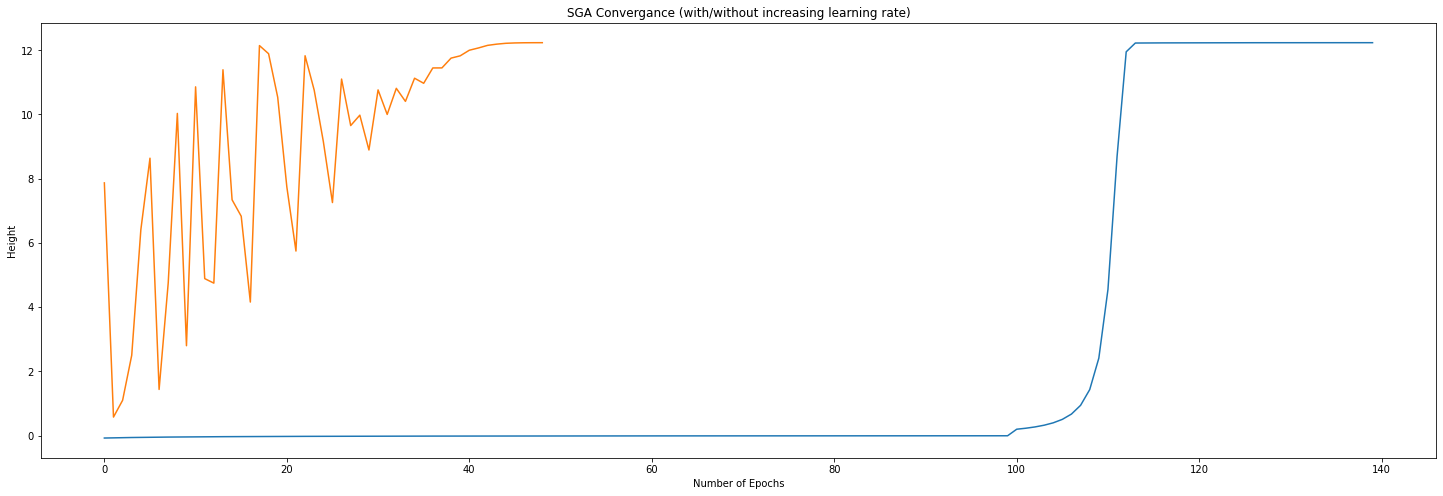

In [47]:
# Fixed learning rate
y_normal = GradAscentLearningRateComplex_plot(0.04)
x_normal = range(len(y_normal))
# Increasing learning rate
y_increasing = GradAscent_Plot(0.118,0.972)
x_increasing = range(len(y_increasing))
print(y_normal)

# plotting 
plt.figure(figsize=(25,8))
plt.plot(x_normal,y_normal)
plt.plot(x_increasing,y_increasing)
plt.ylabel("Height")
plt.xlabel("Number of Epochs")
plt.title("SGA Convergance (with/without increasing learning rate)")
plt.show()